In [12]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams ['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read file data
df = pd.read_csv(r'D:\Documents\anaconda_csv\All_Pokemon_Dataset.csv')

In [2]:
# Check data
df.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [3]:
# check if data is missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing)) # expect Type 2 to have some empty cells, everything else should be 0% empty

Number - 0.0%
Name - 0.0%
Type 1 - 0.0%
Type 2 - 0.4689922480620155%
Abilities - 0.0%
HP - 0.0%
Att - 0.0%
Def - 0.0%
Spa - 0.0%
Spd - 0.0%
Spe - 0.0%
BST - 0.0%
Mean - 0.0%
Standard Deviation - 0.0%
Generation - 0.0%
Experience type - 0.0%
Experience to level 100 - 0.0%
Final Evolution - 0.0%
Catch Rate - 0.0%
Legendary - 0.0%
Mega Evolution - 0.0%
Alolan Form - 0.0%
Galarian Form - 0.0%
Against Normal - 0.0%
Against Fire - 0.0%
Against Water - 0.0%
Against Electric - 0.0%
Against Grass - 0.0%
Against Ice - 0.0%
Against Fighting - 0.0%
Against Poison - 0.0%
Against Ground - 0.0%
Against Flying - 0.0%
Against Psychic - 0.0%
Against Bug - 0.0%
Against Rock - 0.0%
Against Ghost - 0.0%
Against Dragon - 0.0%
Against Dark - 0.0%
Against Steel - 0.0%
Against Fairy - 0.0%
Height - 0.0%
Weight - 0.0%
BMI - 0.0%


In [16]:
# Data types
df['Generation'] = df['Generation'].astype('int64') # change Generation to int
df.dtypes

Number                       int64
Name                        object
Type 1                      object
Type 2                      object
Abilities                   object
HP                           int64
Att                          int64
Def                          int64
Spa                          int64
Spd                          int64
Spe                          int64
BST                          int64
Mean                       float64
Standard Deviation         float64
Generation                   int64
Experience type             object
Experience to level 100      int64
Final Evolution            float64
Catch Rate                   int64
Legendary                  float64
Mega Evolution             float64
Alolan Form                float64
Galarian Form              float64
Against Normal             float64
Against Fire               float64
Against Water              float64
Against Electric           float64
Against Grass              float64
Against Ice         

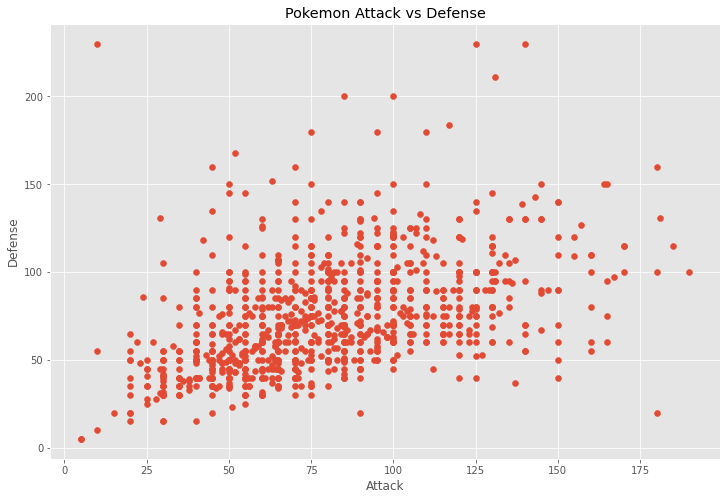

In [9]:
# attack vs defense scatterplot:
plt.scatter(x=df['Att'], y=df['Def'])
plt.title('Pokemon Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

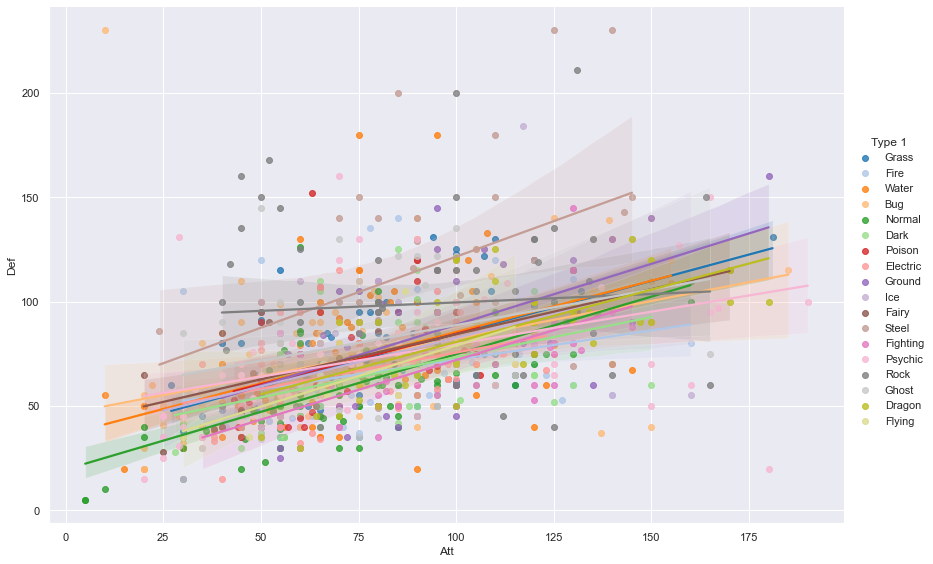

In [70]:
# group scatterplot by Type 1
sns.lmplot(x='Att', y='Def', data=df, fit_reg=True, hue='Type 1', legend=True, palette='tab20', height=8, aspect=1.5)
# based on plot below there is a positive trend between attack and defense stats varying on type

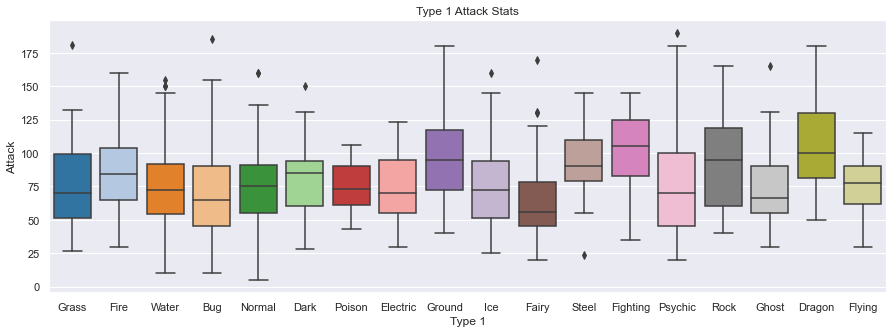

In [63]:
# Attack Boxplot
plt.subplots(figsize = (15,5))
plt.title('Type 1 Attack Stats')
sns.boxplot(x='Type 1', y='Att', data=df, palette='tab20')
plt.xlabel('Type 1')
plt.ylabel('Attack')
plt.show()

# dragon type barely edges out ground for strongest attack

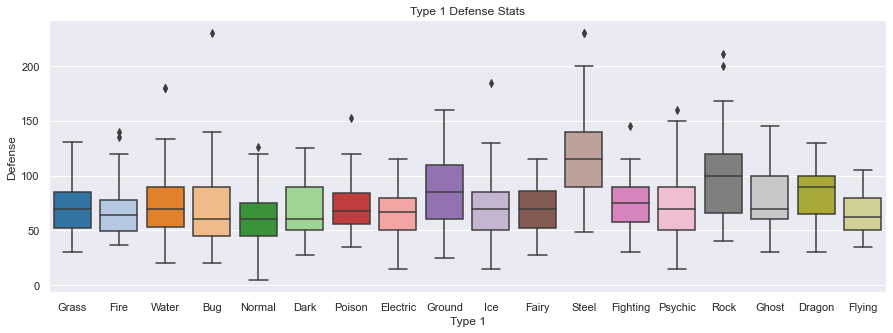

In [64]:
# Defense Boxplot
plt.subplots(figsize = (15,5))
plt.title('Type 1 Defense Stats')
sns.boxplot(x='Type 1', y='Def', data=df, palette='tab20')
plt.xlabel('Type 1')
plt.ylabel('Defense')
plt.show()

# shows steel have highest defense, normal have lowest

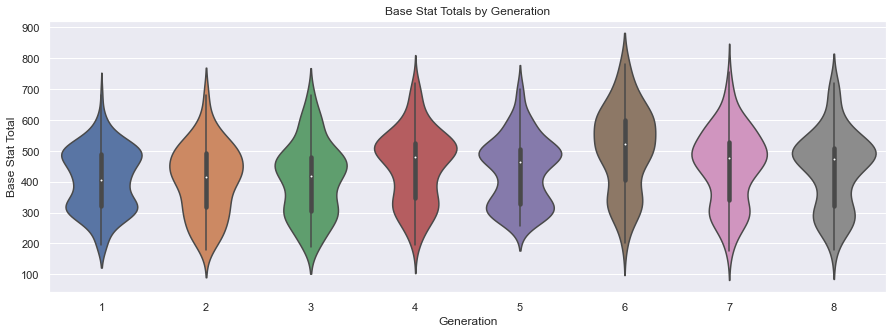

In [61]:
# Violin Plot (Generation vs BST)
plt.subplots(figsize=(15,5))
plt.title('Base Stat Totals by Generation')
sns.violinplot(x='Generation', y='BST', data=df)
plt.xlabel('Generation')
plt.ylabel('Base Stat Total')
plt.show()

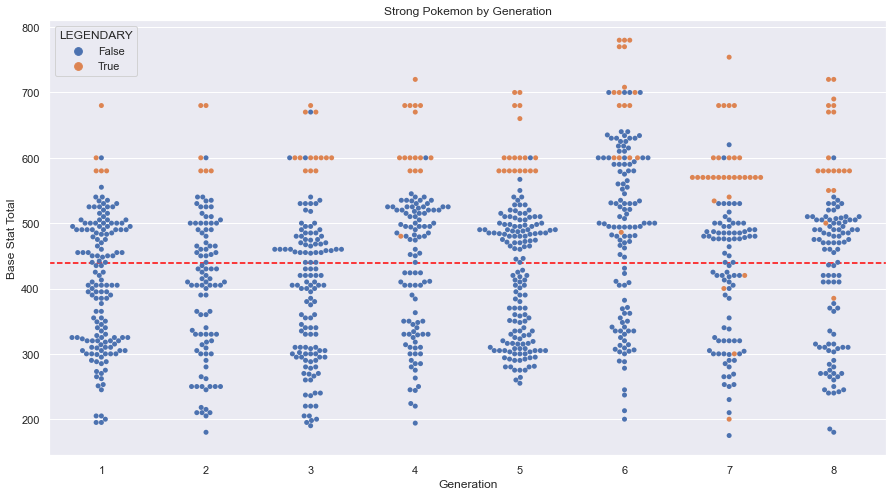

In [100]:
# Where do legendary pokemon stand in terms of total base stats compared to others for each generation?
plt.figure(figsize=(15,8)) # plot dimensions
plt.title('Strong Pokemon by Generation') # plot title
swmplot = sns.swarmplot(x='Generation', y='BST', data=df, hue='Legendary') # set plot variable to sns.swarmplot
plt.xlabel('Generation')
plt.ylabel('Base Stat Total')

# use plot to change legend labels, title, and position
swmplot.legend(handles=swmplot.legend_.legendHandles, labels=['False', 'True'], title='LEGENDARY', loc='upper left')
plt.axhline(df['BST'].mean(),color='red',linestyle='dashed')
plt.show()

# legendary pokemon usually take the top spots in each generation for strongest base stat totals
# gen 6 seem to have the strongest pokemon in terms of legendary and non-legendary pokemon

In [11]:
# select only base stat columns
import pandas as pd
datas = pd.read_csv(r'D:\Documents\anaconda_csv\All_Pokemon_Dataset.csv')
df2 = pd.DataFrame(datas)
dfcorr = df2[["HP", "Att", "Def", "Spa", "Spd", "Spe", "BST"]]
dfcorr.head()

,HP,Att,Def,Spa,Spd,Spe,BST
0,45,49,49,65,65,45,318
1,60,62,63,80,80,60,405
2,80,82,83,100,100,80,525
3,80,100,123,122,120,80,625
4,39,52,43,60,50,65,309


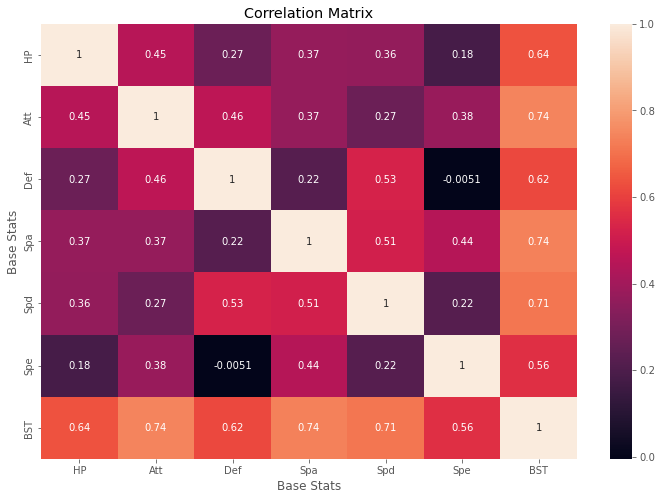

In [14]:
# Visualize correlation of base stats
correlation_matrix = dfcorr.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Base Stats')
plt.ylabel('Base Stats')
plt.show()

# base stat total (BST) has the strongest correlation overall, the strongest being with special attack (Spa)
# outside of BST there is notable correlation between: 
    # defense (Def) and special defense (Spd)
    # speed (Spe) and Spa

In [28]:
# organize correlation of all stats into listed pairs, sort pairs by order, and filter pairs high correlation pairs (0.5-1.0)
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[((sorted_pairs) > 0.5) & ((sorted_pairs) < 1.0)]
pd.set_option('display.max_rows', None)
high_corr

Spd              Spa                0.514828
Spa              Spd                0.514828
Final Evolution  HP                 0.524300
HP               Final Evolution    0.524300
BST              Legendary          0.526330
Legendary        BST                0.526330
                 Mean               0.526330
Mean             Legendary          0.526330
Spd              Def                0.528080
Def              Spd                0.528080
Mean             Height             0.531366
Height           Mean               0.531366
                 BST                0.531366
BST              Height             0.531366
Spa              Final Evolution    0.544006
Final Evolution  Spa                0.544006
                 Att                0.548398
Att              Final Evolution    0.548398
BST              Spe                0.560673
Spe              BST                0.560673
                 Mean               0.560673
Mean             Spe                0.560673
Final Evol